In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from utils import train_val_test_split

In [3]:
df = pd.read_csv("Dataset/IKCO1.csv", index_col = [0])
df

,Date,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,0,Iran.Khodro,2798.0,2802.0,2798.0,2800.0,110870
1,1,Iran.Khodro,2800.0,2810.0,2797.0,2798.0,96613
2,2,Iran.Khodro,2798.0,2800.0,2795.0,2795.0,166600
3,3,Iran.Khodro,2795.0,2849.0,2796.0,2849.0,80676
4,4,Iran.Khodro,2849.0,2848.0,2800.0,2838.0,177362
...,...,...,...,...,...,...,...
4092,4092,Iran.Khodro,3640.0,3780.0,3550.0,3660.0,781890161
4093,4093,Iran.Khodro,3660.0,3680.0,3480.0,3510.0,992705258
4094,4094,Iran.Khodro,3510.0,3540.0,3340.0,3380.0,1059440381
4095,4095,Iran.Khodro,3380.0,3540.0,3280.0,3500.0,1207705349


<AxesSubplot:>

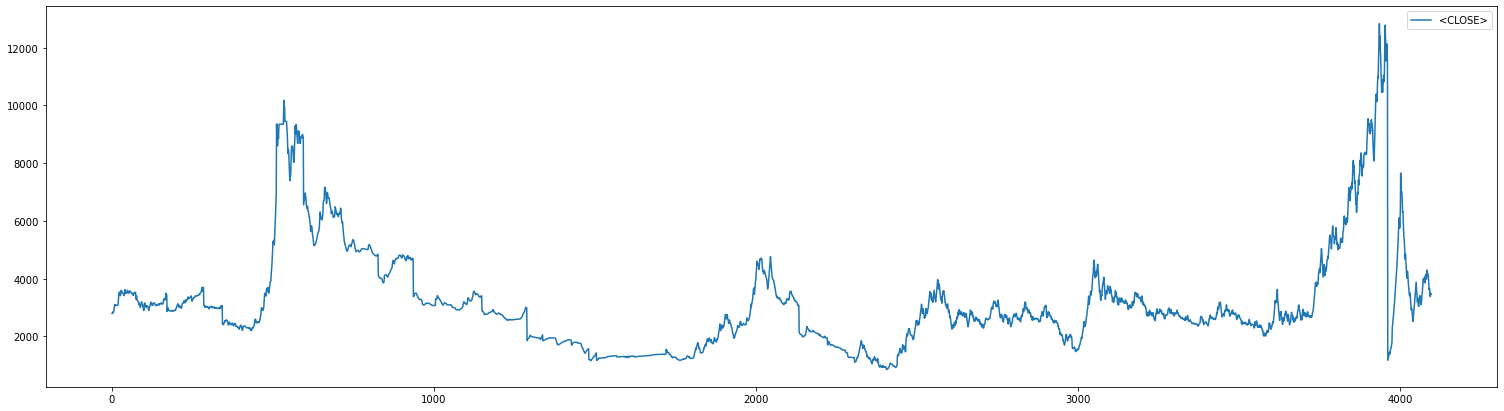

In [4]:
df[['<CLOSE>']].plot(figsize=(26,7))

In [5]:
np.log(df[['<HIGH>']]).diff(1)

,<HIGH>
0,NaN
1,0.002851
2,-0.003565
3,0.017349
4,-0.000351
...,...
4092,0.007968
4093,-0.026811
4094,-0.038786
4095,0.000000


<AxesSubplot:>

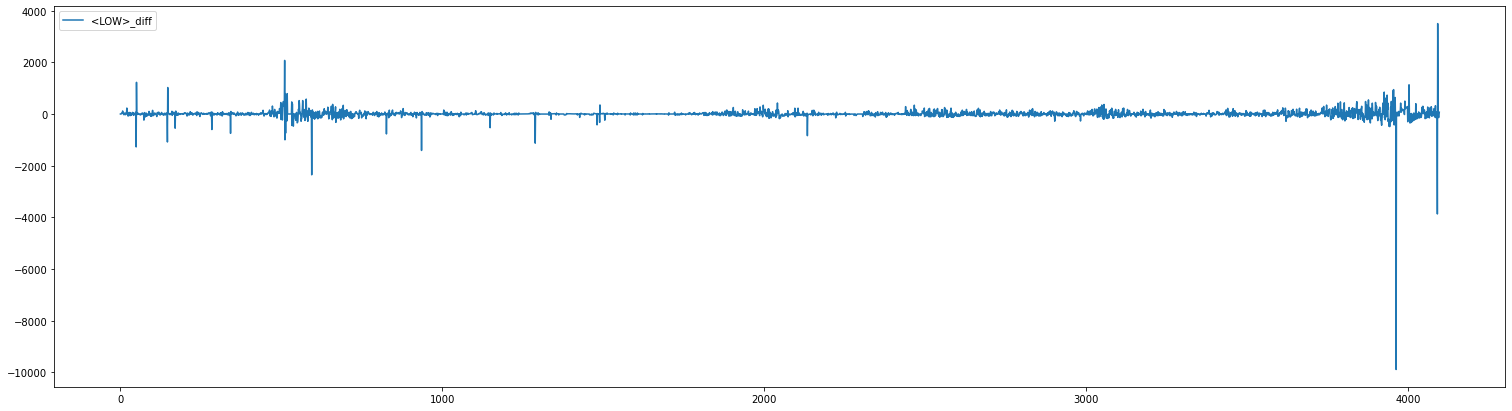

In [6]:
df[['<LOW>_diff']] = df[['<LOW>']].diff(1)
df[['<LOW>_diff']].plot(figsize=(26,7))

In [7]:
from utils import kpss_test, adf_test

adf_test(df[['<LOW>_diff']].dropna())

Test statistics               -1.349145e+01
p-value                        3.100540e-25
#lags used                     3.100000e+01
Number of observations used    4.064000e+03
Critical Value (1%)           -3.431960e+00
Critical Value (5%)           -2.862251e+00
Critical Value (10%)          -2.567149e+00
dtype: float64


In [8]:
kpss_test(df[['<LOW>_diff']].dropna())

Results of KPSS Test:
Test Statistic            0.018149
p-value                   0.100000
Lags Used                31.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [9]:
def diff_inv(series_diff, first_value):

    series_inverted = np.r_[first_value, series_diff].cumsum().astype('float64')
    return series_inverted

<AxesSubplot:>

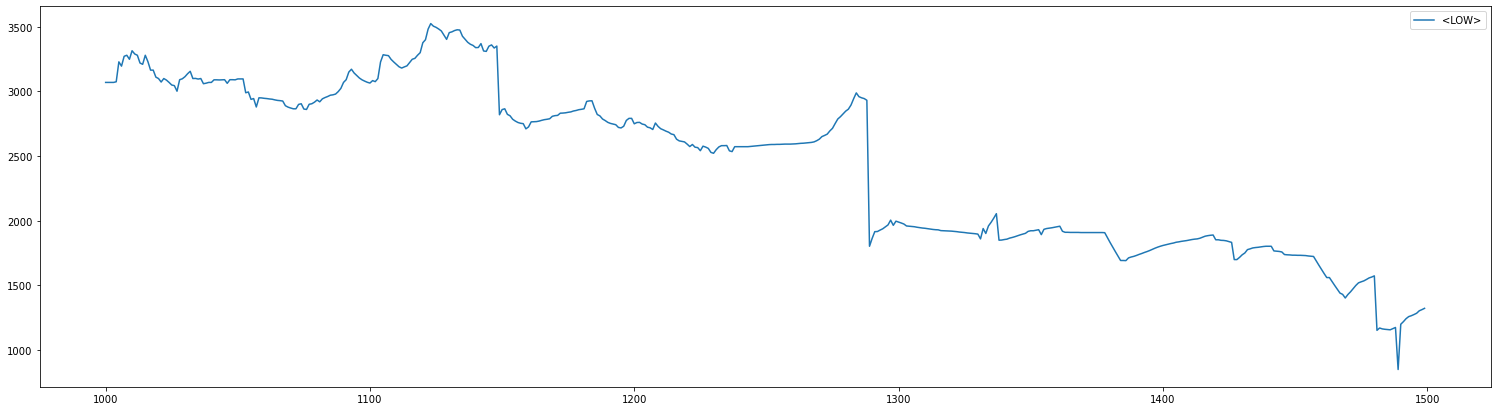

In [10]:
train = df[:1000]
test = df[1000:1500]

test[['<LOW>']].plot(figsize=(26,7))

In [11]:
df[['<CLOSE>']][-91:][:-1]

,<CLOSE>
4006,6970.0
4007,6630.0
4008,6300.0
4009,6320.0
4010,6010.0
...,...
4091,3640.0
4092,3660.0
4093,3510.0
4094,3380.0


<AxesSubplot:>

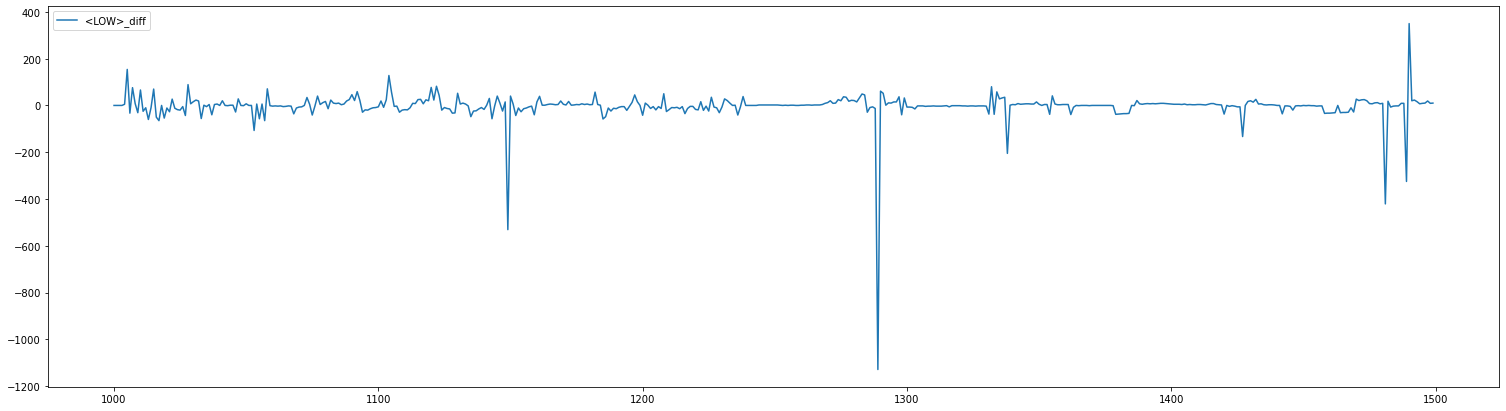

In [12]:
test[['<LOW>_diff']].plot(figsize=(26,7))

<AxesSubplot:>

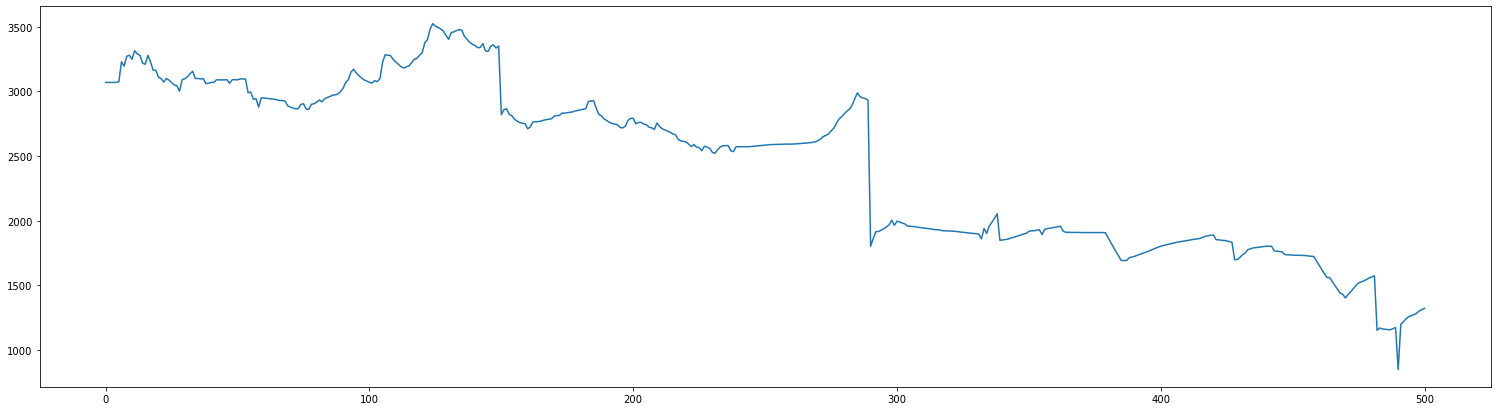

In [13]:
pd.Series(diff_inv(test['<LOW>_diff'], train['<LOW>'][len(train)-1])).plot(figsize=(26,7))

In [33]:
df[['<CLOSE>']][1:10].max()[0]

3102.0

In [15]:
df = df[['<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>']] 

In [31]:
def create_dataset(X, y, time_step, k_days):

    dataX, dataY = [], []
    
    for i in range(time_step, len(X) - k_days):

        dataX.append(X[i - time_step : i])
        dataY.append(y[i : i + k_days].max())
        
    return np.array(dataX), np.array(dataY)

x, y = create_dataset(df, df['<CLOSE>'], 21, 10)

In [34]:
y

array([3598., 3598., 3598., ..., 4300., 4180., 4170.])